In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump, load
import scipy.io
import xgboost as xgb

In [2]:
mat_data = scipy.io.loadmat('MNIST-LeNet5.mat')
print('keys -> ', mat_data.keys())

X = mat_data['train_fea']
Y = mat_data['train_gnd']
Y = Y - 1

# val_x = X[50000:60000]
# val_y = Y[50000:60000]
# X = X[0:50000]
# Y = Y[0:50000]
test_X = mat_data['test_fea']
test_Y = mat_data['test_gnd']
test_Y -= 1

print('train data shape -> ', X.shape)
print('test data shape -> ', test_X.shape)
print('train labels shape -> ', Y.shape)
print('test labels shape -> ', test_Y.shape)

keys ->  dict_keys(['__header__', '__version__', '__globals__', 'test_fea', 'test_gnd', 'train_fea', 'train_gnd'])
train data shape ->  (60000, 800)
test data shape ->  (10000, 800)
train labels shape ->  (60000, 1)
test labels shape ->  (10000, 1)


In [10]:
# max_depth = [2, 4, 6, 8, 10, 20]
# eta_vals = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1, 2, 5, 10]
# n_est = [1, 5, 10, 20, 50, 100]
max_depth = [2, 4, 6, 8, 10, 20, 50, 100]
n_est = [1, 5, 10, 20, 50, 100]
dpth = 10
et = 0.1
n = 100
best_acc = 0
best_params = {}
best_model = None
acc_list = []
depths = []

In [7]:
for depth in max_depth:
    params = {'max_depth': depth,
                      'eta': et, #learning rate
                      'n_estimators': n, #number of trees
                      'objective': 'multi:softmax', 
                      'num_class': 10,
                      'verbosity': 0,
                      'tree_method': 'gpu_hist'
                      }
    clf = xgb.XGBClassifier(**params)
    clf.fit(X, Y)
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_Y, y_pred)
    if accuracy > best_acc:
        best_acc = accuracy
        best_params = params
        best_model = clf
    print(f"max_depth: {depth}, eta: {et}, n_estimators: {n}, Accuracy: {accuracy}")
    acc_list.append(accuracy)
    depths.append(depth)

max_depth: 2, eta: 0.1, n_estimators: 100, Accuracy: 0.9727
max_depth: 4, eta: 0.1, n_estimators: 100, Accuracy: 0.9852
max_depth: 6, eta: 0.1, n_estimators: 100, Accuracy: 0.9866
max_depth: 8, eta: 0.1, n_estimators: 100, Accuracy: 0.9869
max_depth: 10, eta: 0.1, n_estimators: 100, Accuracy: 0.9856
max_depth: 20, eta: 0.1, n_estimators: 100, Accuracy: 0.9858
max_depth: 50, eta: 0.1, n_estimators: 100, Accuracy: 0.9859
max_depth: 100, eta: 0.1, n_estimators: 100, Accuracy: 0.9859


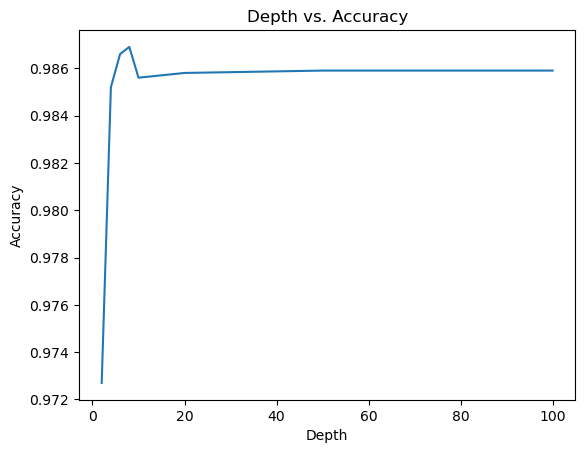

In [8]:
# plot max_depth vs accuracy
# Create a line plot
plt.plot(depths, acc_list)

# Add axis labels and a title
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Depth vs. Accuracy')

# Show the plot
plt.show()

In [11]:
n_list = []
for n in n_est:
    params = {'max_depth': dpth,
                      'eta': et, #learning rate
                      'n_estimators': n, #number of trees
                      'objective': 'multi:softmax', 
                      'num_class': 10,
                      'verbosity': 0,
                      'tree_method': 'gpu_hist'
                      }
    clf = xgb.XGBClassifier(**params)
    clf.fit(X, Y)
    y_pred = clf.predict(test_X)
    accuracy = accuracy_score(test_Y, y_pred)
    if accuracy > best_acc:
        best_acc = accuracy
        best_params = params
        best_model = clf
    print(f"max_depth: {dpth}, eta: {et}, n_estimators: {n}, Accuracy: {accuracy}")
    acc_list.append(accuracy)
    n_list.append(depth)

max_depth: 10, eta: 0.1, n_estimators: 1, Accuracy: 0.9436
max_depth: 10, eta: 0.1, n_estimators: 5, Accuracy: 0.9709
max_depth: 10, eta: 0.1, n_estimators: 10, Accuracy: 0.9752
max_depth: 10, eta: 0.1, n_estimators: 20, Accuracy: 0.9777
max_depth: 10, eta: 0.1, n_estimators: 50, Accuracy: 0.9836
max_depth: 10, eta: 0.1, n_estimators: 100, Accuracy: 0.9856


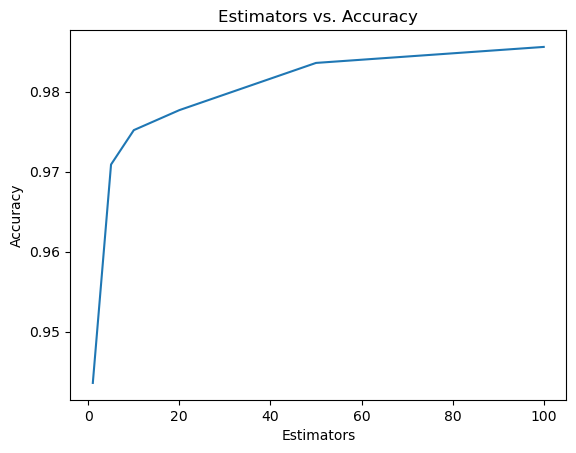

In [12]:
# plot max_depth vs accuracy
# Create a line plot
plt.plot(n_est, acc_list)

# Add axis labels and a title
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('Estimators vs. Accuracy')

# Show the plot
plt.show()